In [1]:
from __future__ import division, print_function

import numpy as np
import pandas as pd

from IPython.core.display import Image, HTML

import random

import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
np.random.seed(0)

n_samples = 30
degrees = [1, 2, 4, 16]

# set the true function
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# set the X and y points incorporating noise
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regularization & Overfitting

Week 3 | Day 2

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Explain the concepts of overfitting and under-fitting
- Explain regularization
- Differentiate between L1 and L2 penalties and understand their impact on feature coefficients
- Use scikit-learn to apply regularization
- Use cross-validation to tune the regularization parameters

## Recap - Sum of Squared Residuals

Yesterday, we discussed that in order to find the line of best fit for a linear regression, we needed to minimize the sum of squared errors.

<img src="http://i.imgur.com/Qs9MwV9.jpg" width=500>

## We position the line such that when all the boxes are added up, their area is the minimum possible

![](http://i.imgur.com/JYi1PBp.jpg)

## Mathematical Formulation for sum of squared residuals

<img src="http://i.imgur.com/yBADwUb.png" width=400>

## Solving this gave us the best linear unbiased estimator (BLUE)

## But what if minimizing the error gives us a model that is great on our training data, but not so great on out-of-sample data?

<img src="http://i.imgur.com/C9EmsUV.png" width=500>

## When might this happen? When could we have too complex a model?

- Few samples compared to the number of features

## So if we have a large number of features, we can end up with a model that fits our training set well, but fails to generalize to our test data

To remedy this, we can make a tradeoff: We can increase the bias of our model in order to reduce the variance. It can
make sense to do this when the increase in bias is small compared to the decrease in variance.

## So how can we go about remedying this if we can't increase samples easily?

## We have two choices

1. Remove selected features manually - problem is this may remove some valuable info

2. Regularization - keep all features, but reduce their "pull" in the model

## This "pull" reduction is accomplished by constraining their coefficients

- That is we impose a cost or a penalty to having a high $Beta$
- This means that we have moved away from the minimum error (increased bias) in order to the reduce variance of our model

<img src="http://i.imgur.com/CkRe7Ru.png" width=500>

## Visualizing overfitting

## One way to represent this is with polynomial features

<img src="http://i.imgur.com/5s5uixr.jpg" width=500>

## Increasing features from 1 to 16 degree polynomial

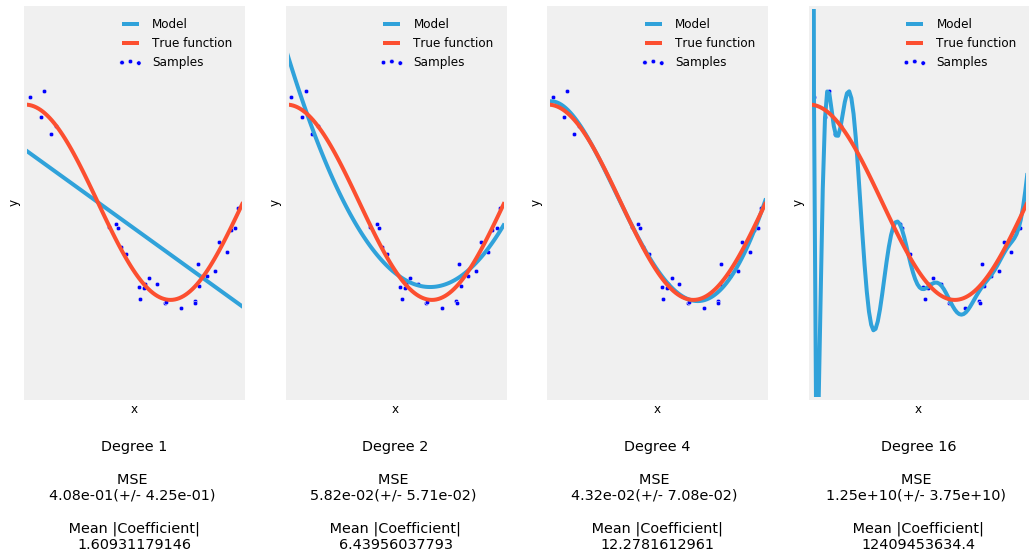

In [3]:
# set the plot size
plt.subplots(figsize=(16,7))

# create a plot for each polynomial degree plotted
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    sum_abs = sum(abs(linear_regression.coef_))/(len(linear_regression.coef_))
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e}) \n\n Mean |Coefficient| \n{:}"
    .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4) 
    # mean of the absolute of all coef excluding the intercept

As we increase the degree of the polynomial we can see the MSE fall and the mean coefficient size rise dramatically

# Let's talk about that penalty

Previously, we minimized the sum of squared error, but now we are minimizing that plus the size of the coefficients times some weight (either called lambda or alpha). Theta here is the size of our all our coefficients.

$$ min \sum ( y_{i} - \hat{y} )^2 + \lambda \theta $$

$$ \lambda $$ <center>may also be called</center> $$ \alpha $$

## The two most common penalties (Lp norms)

1. L1 - LASSO
2. L2 - Ridge

## Lasso (L1) vs. Ridge (L2) Regressions

<img src="http://i.imgur.com/c8BZW3i.png" width=700>

## Ridge Regression (L2)

<img src="http://i.imgur.com/IN8vDD0.png" width=700>

## Lasso (L1)

<img src="http://i.imgur.com/aXZZhMa.png" width=700>

## Consequences of L1 vs. L2

<img src="http://i.imgur.com/rLHVGtt.png" width=600>

# Let's look at Lasso Regression (L1)

The following examples are a 16th degree polynomial. We are going to examine the effect of increasing alpha.

## Lasso (L1): alpha = ~0

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


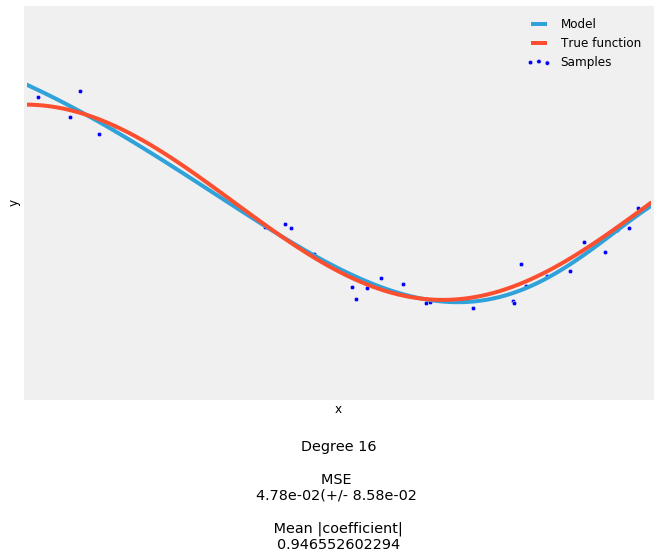

In [4]:
# set the plot size
fig, ax = plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=0.00000000000000000000000000001)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, \
                                          scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}".\
          format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Lasso (L1): alpha = .1

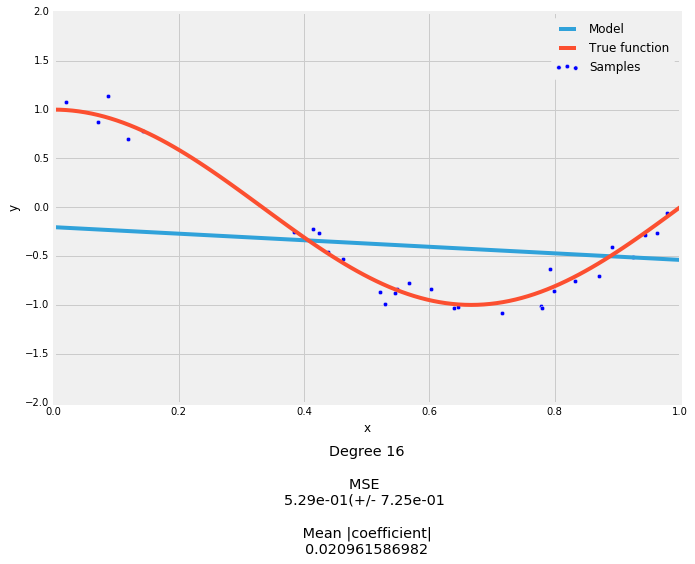

In [5]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=.1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Lasso (L1): alpha = 1

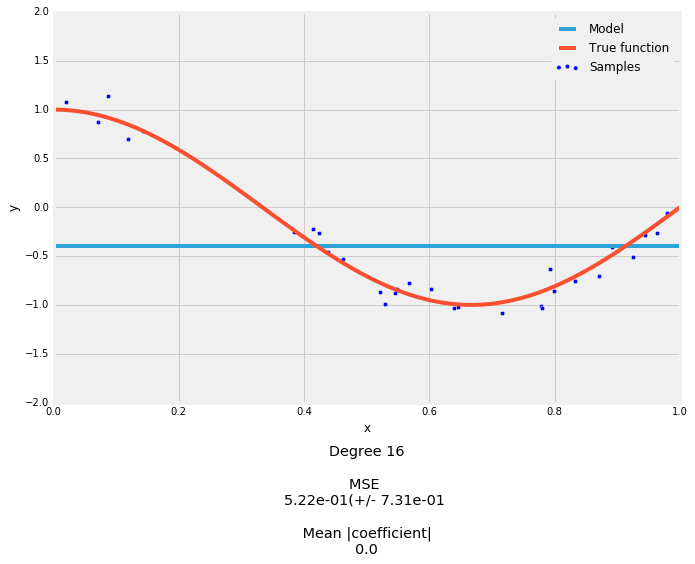

In [6]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## At alpha = 1, Lasso has dropped the mean coefficient to 0 
<br>
We have essentially come to the point where our model is simply the mean of the y values

## Now, let's take a look at Ridge Regression (L2)

## Ridge Regression - L2 - alpha equals 0

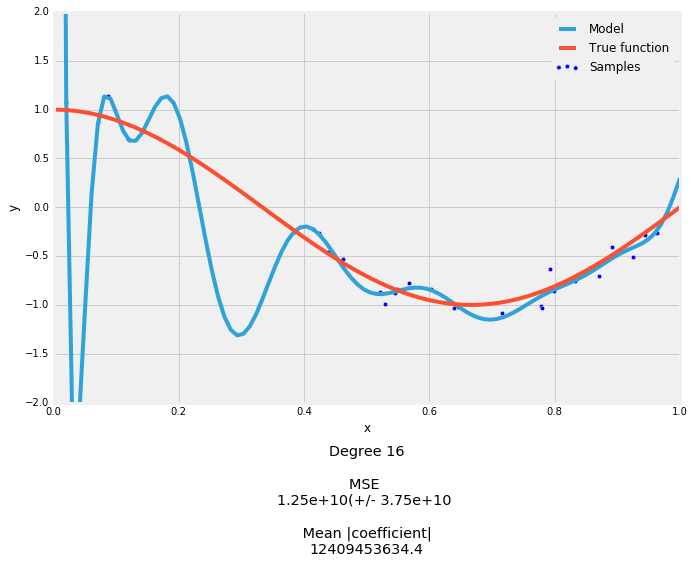

In [7]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=0)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Ridge Regression (L2): alpha = 1

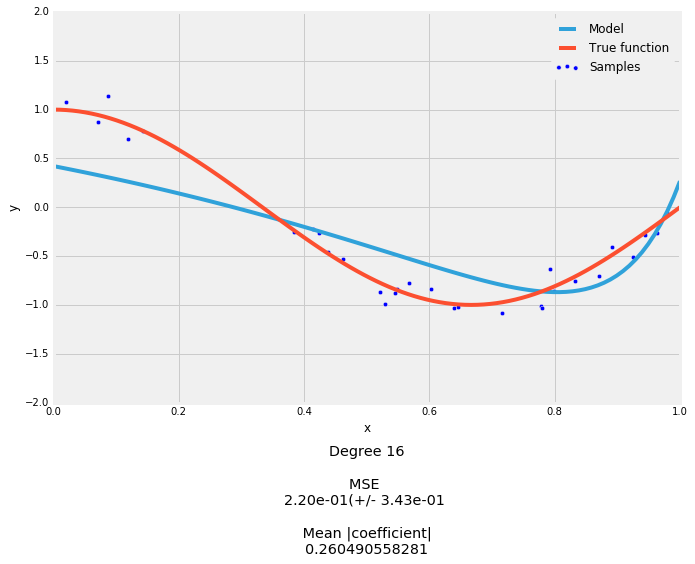

In [8]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Ridge Regression (L2): alpha = 10

Even at alpha = 10, the mean coefficient is not 0

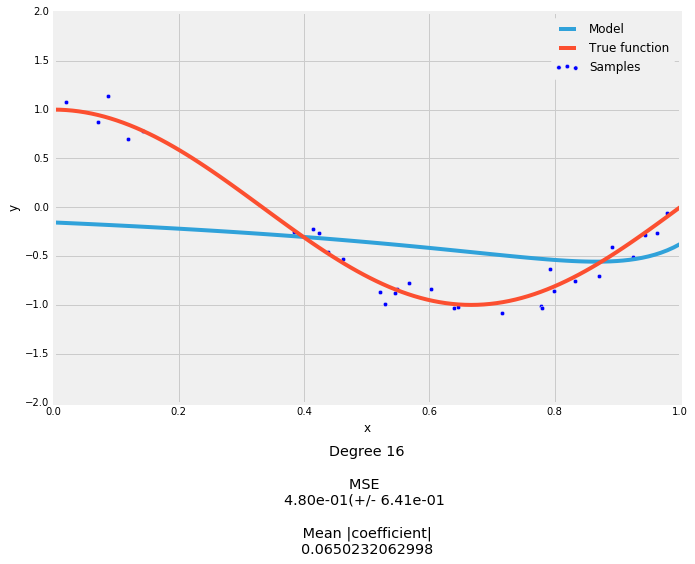

In [9]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=10)

polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## How can we figure out what the proper alpha is?

# Cross-validation

In [12]:
linear_model.RidgeCV?

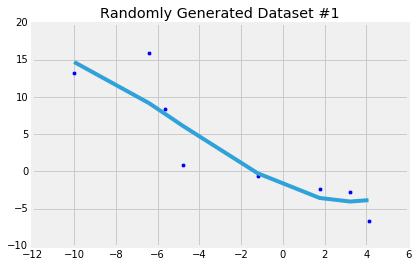

Train R-squared: 0.82030323941


CV-selected alpha: 10.0


Test R-squared: 0.459049180883


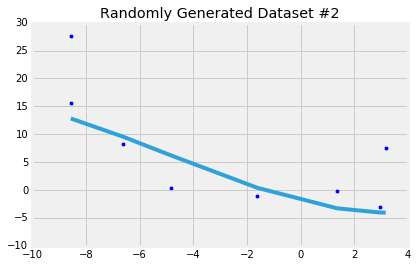

In [10]:
# Generate some data
def generate_data():
    xs = np.arange(-4, 4, 1)
    data = [(2 * x - 3 * random.random(), (x - 5*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

rlmcv = linear_model.RidgeCV(cv=5)
xs, ys = generate_data()
xs2, ys2 = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

# Trained model
plt.scatter(xs, ys)
plt.title("Randomly Generated Dataset #1")
plt.plot(xs, predictions)
plt.show()
print("Train R-squared:", ridge_model.score(X, ys))
print("\n\nCV-selected alpha:", ridge_model.alpha_)

# Test model
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)

print('\n\nTest R-squared:', ridge_model.score(X, ys2))

# What if we had no penalty?

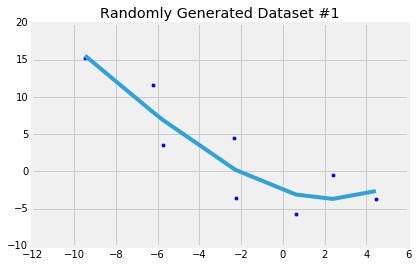

Train R-squared: 0.813975455849


CV-selected alpha: 0


Test R-squared: 0.549202923704


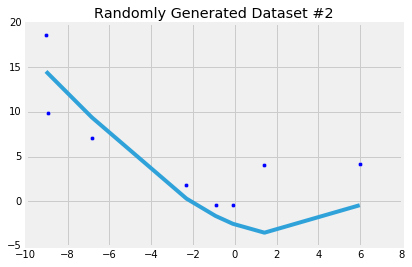

In [11]:
# Generate some data
def generate_data():
    xs = np.arange(-4, 4, 1)
    data = [(2 * x - 3 * random.random(), (x - 5*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

rm = linear_model.Ridge(alpha=0)
xs, ys = generate_data()
xs2, ys2 = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rm.fit(X, y)
predictions = ridge_model.predict(X)

# Trained model
plt.scatter(xs, ys)
plt.title("Randomly Generated Dataset #1")
plt.plot(xs, predictions)
plt.show()
print("Train R-squared:", ridge_model.score(X, ys))
print("\n\nCV-selected alpha:", rm.alpha)

# Test model
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)

print('\n\nTest R-squared:', ridge_model.score(X, ys2))

# Independent Practice

There is some started code in the repo for this lesson. Work through the examples there and the exercise.
There is solution code as well. Use it only when you get stuck.

## Conclusion

Takeaway messages for this lesson

- Regularization helps avoid overfitting by limiting model complexity
- Mathematically this works by penalizing models with greater complexity
- Regularized models will often fit alternate datasets better than a model that's been overfit on the training data